# PyFolding

Let's test out our **PyFolding** installation using an IPython notebook. This is a nice way to store data, processing and results all in one place!

---

### Testing *PyFolding*

PyFolding contains a standard test function to make sure that the installation is functioning correctly. This standard test function automatically generates data for a two-state folding protein: $D \leftrightharpoons N$

This includes a two-state equilibrium denaturation curve:
\begin{equation}
F = \frac{\exp( m(x-d_{50})) / RT} { 1+\exp(m(x-d_{50}))/RT}
\end{equation}

and a two-state chevron plot:
\begin{equation}
k_{obs} = k_u^{H_2O}\exp(-m_{ku}x) + k_f^{H_2O}\exp(m_{kf}x)
\end{equation}


Here is an example script:

 Fitting results 
ID: Simulated protein
Model: TwoStateEquilibrium
Method: scipy.optimize.curve_fit 

m: 1.50016 ± 0.00000
d50: 5.00001 ± 0.00000
--------------------------------------------------
 Fitting results 
ID: Simulated protein
Model: TwoStateChevron
Method: scipy.optimize.curve_fit 

kf: 100.02214 ± 0.00009
mf: 0.99995 ± 0.00000
ku: 0.00499 ± 0.00000
mu: 1.00023 ± 0.00000
--------------------------------------------------
Test completed!


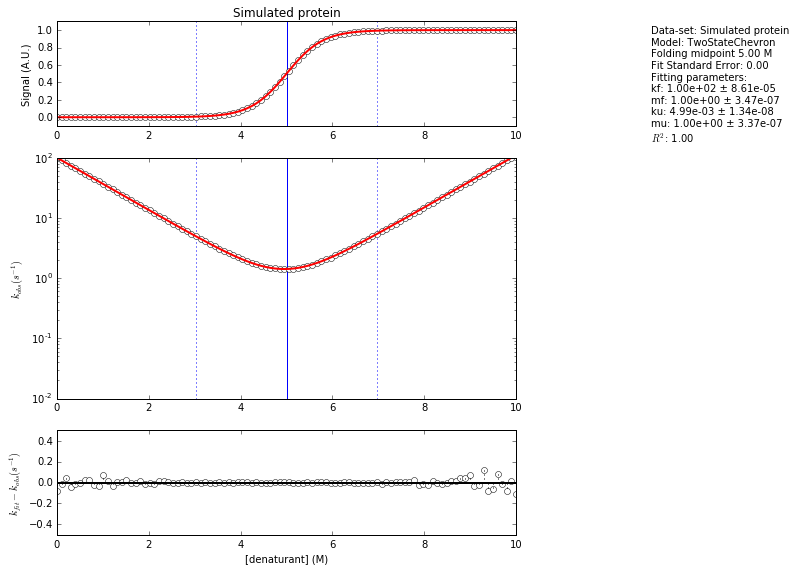

In [1]:
%matplotlib inline

# import pyfolding
import pyfolding

# now test it
pyfolding.test()

---

### Displaying details of the fitting equations
 We can list all of the models available by calling the ```list_models``` function:

In [2]:
from pyfolding.models import *

list_models()

['HomozipperIsingEquilibrium',
 'ParallelTwoStateChevron',
 'ParallelTwoStateUnfoldingChevron',
 'TemplateModel',
 'ThreeStateChevron',
 'ThreeStateDimericIEquilibrium',
 'ThreeStateFastPhaseChevron',
 'ThreeStateMonoIEquilibrium',
 'ThreeStateSequentialChevron',
 'TwoStateChevron',
 'TwoStateChevronMovingTransition',
 'TwoStateDimerEquilibrium',
 'TwoStateEquilibrium',
 'TwoStateEquilibriumSloping']

If we want to know any further information, we can print the equation. Each function has a pre-formatted $\LaTeX$ equation which can be displayed using the ```print_equation()``` function bound to each FitModel:

In [3]:
TwoStateEquilibrium().print_equation()

<IPython.core.display.Math object>

In [4]:
TwoStateChevron().print_equation()

<IPython.core.display.Math object>

In [5]:
ThreeStateChevron().print_equation()

<IPython.core.display.Math object>

If we would like to get further details, for example the arguments of the equation, we can get those easily by request the fit function arguments:

In [6]:
ThreeStateChevron().fit_func_args

['kfi', 'mif', 'kif', 'mi', 'Kiu', 'mu']